In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
ch=fetch_california_housing()
df=pd.DataFrame(ch.data,columns=ch.feature_names)
df['MedHouseVal']=ch.target
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Transformaciones para comparar variables

## Normalización estandar
También conocida como *Estandarización*. La variable resultante $X'$, tiene media en cero y desviación estándar uno:
$$
X'=\frac{X-\mu}{\sigma},
$$
donde $\mu$ y $\sigma$ son la media y desviación estándar de $X$ respectivamente.

In [11]:
# Usando Numpy
me=df.mean()
s=df.std()        # Pandas usa la desviación estandar muestral
df_std=(df-me)/s
df_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,4.406467e-17,1.101617e-17,6.885104e-17,-1.018995e-16,-1.514723e-17,2.754042e-18,-1.035520e-15,-8.526513e-15,1.982910e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.774256e+00,-2.196127e+00,-1.852274e+00,-1.610729e+00,-1.256092e+00,-2.289944e-01,-1.447533e+00,-2.385935e+00,-1.662601e+00
25%,-6.881019e-01,-8.453727e-01,-3.994399e-01,-1.911670e-01,-5.637952e-01,-6.170912e-02,-7.967694e-01,-1.113182e+00,-7.561450e-01
50%,-1.767908e-01,2.864502e-02,-8.078293e-02,-1.010626e-01,-2.291262e-01,-2.431526e-02,-6.422715e-01,5.389006e-01,-2.353280e-01
75%,4.592952e-01,6.642943e-01,2.519554e-01,6.015724e-03,2.644885e-01,2.037404e-02,9.729330e-01,7.784775e-01,5.014851e-01
max,5.858144e+00,1.856137e+00,5.516190e+01,6.957003e+01,3.024960e+01,1.194162e+02,2.957996e+00,2.625216e+00,2.540349e+00


In [12]:
# Usando una función definida
from scipy.stats import zscore

In [13]:
df_std=df.apply(zscore) # zscore calcula la desviación estandar poblacional
df_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15,2.037991e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,-1.662641e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,-7.561633e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,-2.353337e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,5.014973e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,2.540411e+00


In [14]:
# Usando Sklearn
from sklearn.preprocessing import StandardScaler

In [15]:
esc_std=StandardScaler()
df_std=esc_std.fit_transform(df)
df_std=pd.DataFrame(df_std,columns=df.columns)
df_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15,2.037991e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,-1.662641e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,-7.561633e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,-2.353337e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,5.014973e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,2.540411e+00


In [16]:
# Media calculada
esc_std.mean_

array([ 3.87067100e+00,  2.86394864e+01,  5.42899974e+00,  1.09667515e+00,
        1.42547674e+03,  3.07065516e+00,  3.56318614e+01, -1.19569704e+02,
        2.06855817e+00])

In [17]:
# Desviación estandar
esc_std.scale_

array([1.89977569e+00, 1.25852527e+01, 2.47411320e+00, 4.73899376e-01,
       1.13243469e+03, 1.03857980e+01, 2.13590065e+00, 2.00348319e+00,
       1.15392820e+00])

## Escalamiento por cuantiles
La variable transformada $X'$, tiene mediana en cero y desviación estándar uno:
$$
X'=\frac{X-Q_2}{Q_3-Q_1},
$$
donde $Q_1$, $Q_2$ y $Q_3$ son los cuartiles de $X$.

In [18]:
# Usando Numpy
Q=np.quantile(df,q=[0.25,0.5,0.75],axis=0)
df_q=(df-Q[1])/(Q[2]-Q[0])
df_q.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.540799e-01,-0.018974,0.124015,0.512533,0.276628,0.296227,0.362926,-0.284882,0.187120
std,8.715378e-01,0.662398,1.535166,5.071439,1.207316,12.182767,0.565067,0.528636,0.795146
min,-1.392252e+00,-1.473684,-2.719533,-7.656179,-1.239872,-2.493559,-0.455026,-1.546174,-1.134891
25%,-4.456270e-01,-0.578947,-0.489191,-0.456959,-0.404051,-0.455561,-0.087302,-0.873351,-0.414126
50%,1.018608e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.543730e-01,0.421053,0.510809,0.543041,0.595949,0.544439,0.912698,0.126649,0.585874
max,5.259674e+00,1.210526,84.806698,353.332681,36.797441,1455.116059,2.034392,1.102902,2.207070


In [19]:
# Usando Sklearn
from sklearn.preprocessing import RobustScaler

In [20]:
esc_robust=RobustScaler()
df_robust=esc_robust.fit_transform(df)
df_robust=pd.DataFrame(df_robust,columns=df.columns)
df_robust.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.540799e-01,-0.018974,0.124015,0.512533,0.276628,0.296227,0.362926,-0.284882,0.187120
std,8.715378e-01,0.662398,1.535166,5.071439,1.207316,12.182767,0.565067,0.528636,0.795146
min,-1.392252e+00,-1.473684,-2.719533,-7.656179,-1.239872,-2.493559,-0.455026,-1.546174,-1.134891
25%,-4.456270e-01,-0.578947,-0.489191,-0.456959,-0.404051,-0.455561,-0.087302,-0.873351,-0.414126
50%,1.018608e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.543730e-01,0.421053,0.510809,0.543041,0.595949,0.544439,0.912698,0.126649,0.585874
max,5.259674e+00,1.210526,84.806698,353.332681,36.797441,1455.116059,2.034392,1.102902,2.207070


In [21]:
# Mediana
esc_robust.center_

array([ 3.53480000e+00,  2.90000000e+01,  5.22912879e+00,  1.04878049e+00,
        1.16600000e+03,  2.81811565e+00,  3.42600000e+01, -1.18490000e+02,
        1.79700000e+00])

In [22]:
# Rango intercuartílico
esc_robust.scale_

array([2.17985000e+00, 1.90000000e+01, 1.61166472e+00, 9.34470203e-02,
       9.38000000e+02, 8.52519777e-01, 3.78000000e+00, 3.79000000e+00,
       1.45125000e+00])

In [23]:
# RobustScaler?

# Transformaciones para aplicarle una función a la variable

## Normalización basada en la media
La variable transformada tiene media en cero y rango uno
$$
X'=\frac{X-\mu}{\mathrm{max}(X)-\mathrm{min}(X)}.
$$
El intervalo de la variable resultante es $X'\in(-1,1)$.

In [24]:
# Usando NumPy
me

,0
MedInc,3.870671
HouseAge,28.639486
AveRooms,5.429000
AveBedrms,1.096675
Population,1425.476744
AveOccup,3.070655
Latitude,35.631861
Longitude,-119.569704
MedHouseVal,2.068558


In [25]:
df_media=(df-me)/(df.max()-df.min())
df_media.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,5.508083e-18,5.508083e-18,1.290957e-18,-1.420053e-18,-3.442552e-19,5.378988e-21,-2.368476e-16,-1.707506e-15,5.508083e-17
std,1.310204e-01,2.467756e-01,1.753950e-02,1.404874e-02,3.174030e-02,8.358045e-03,2.269875e-01,1.995550e-01,2.379281e-01
min,-2.324638e-01,-5.419507e-01,-3.248795e-02,-2.262871e-02,-3.986874e-02,-1.913946e-03,-3.285719e-01,-4.761251e-01,-3.955794e-01
25%,-9.015538e-02,-2.086174e-01,-7.005976e-03,-2.685655e-03,-1.789503e-02,-5.157676e-04,-1.808567e-01,-2.221410e-01,-1.799082e-01
50%,-2.316320e-02,7.068893e-03,-1.416892e-03,-1.419802e-03,-7.272534e-03,-2.032280e-04,-1.457876e-01,1.075403e-01,-5.599114e-02
75%,6.017703e-02,1.639316e-01,4.419171e-03,8.451334e-05,8.394945e-03,1.702871e-04,2.208436e-01,1.553490e-01,1.193174e-01
max,7.675362e-01,4.580493e-01,9.675120e-01,9.773713e-01,9.601313e-01,9.980861e-01,6.714281e-01,5.238749e-01,6.044206e-01


## Escalamiento Mínimo-Máximo
Buscamos que la variable transformada $X'\in[0,1]$:
$$
X'=\frac{X-\mathrm{mín}(X)}{\mathrm{máx}(X)-\mathrm{mín}(X)}.
$$

Aplicable, por ejemplo, a porcentajes de población.

In [26]:
# Usando NumPy
m=df.min()
M=df.max()
df_minmax=(df-m)/(M-m)
df_minmax.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,0.395579
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,0.215671
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,0.339588
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Usando Sklearn
from sklearn.preprocessing import MinMaxScaler

In [28]:
esc_minmax=MinMaxScaler()
df_minmax=esc_minmax.fit_transform(df)
df_minmax=pd.DataFrame(df_minmax,columns=df.columns)
df_minmax.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,0.395579
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,0.215671
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,0.339588
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
esc_minmax=MinMaxScaler(feature_range=(5,8))         # (8-5)*(x-x.min())/(x.max()-x.min())+5
df_minmax=esc_minmax.fit_transform(df)
df_minmax=pd.DataFrame(df_minmax,columns=df.columns)
df_minmax.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.697391,6.625852,5.097464,5.067886,5.119606,5.005742,5.985716,6.428375,6.186738
std,0.393061,0.740327,0.052618,0.042146,0.095221,0.025074,0.680963,0.598665,0.713784
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,5.426925,6.000000,5.076446,5.059829,5.065921,5.004195,5.443146,5.761952,5.647014
50%,5.627902,6.647059,5.093213,5.063627,5.097789,5.005132,5.548353,6.750996,6.018765
75%,5.877922,7.117647,5.110721,5.068140,5.144791,5.006253,6.648247,6.894422,6.544691
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


## Escalamiento por máximo absoluto
$$
X'=\frac{X}{\mathrm{máx}(|X|)}.
$$
Lo aplicamos si tenemos pocos datos o $X$ está centrada.

El rengo de la variable transformada es $X'\in(-1,1]$ si el máximo absoluto de $X$ es positivo o $X'\in[-1,1)$ si el máximo absoluto de $X$ es negativo.

In [30]:
# Usando NumPy
maxabs=np.max(np.abs(df),axis=0)
df_maxabs=df/maxabs
df_maxabs.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.258043,0.550759,0.038257,0.032192,0.039949,0.002470,0.849389,-0.961558,0.413711
std,0.126654,0.242030,0.017435,0.013911,0.031738,0.008353,0.050917,0.016112,0.230791
min,0.033326,0.019231,0.005963,0.009785,0.000084,0.000557,0.775685,-1.000000,0.029998
25%,0.170892,0.346154,0.031293,0.029533,0.022056,0.001954,0.808820,-0.979493,0.239200
50%,0.235652,0.557692,0.036848,0.030786,0.032678,0.002267,0.816687,-0.952875,0.359399
75%,0.316215,0.711538,0.042650,0.032276,0.048344,0.002640,0.898927,-0.949015,0.529449
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.919260,1.000000


In [31]:
# Antes que nada, buenos días. Centramos la variable
X_centrada=df-df.mean()
maxabs=np.max(np.abs(X_centrada),axis=0)
df_maxabs=X_centrada/maxabs
df_maxabs.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,1.032766e-17,2.754042e-17,1.204893e-18,-1.463085e-18,-3.442552e-19,1.613696e-20,-3.635335e-16,-3.238753e-15,7.435912e-17
std,1.707025e-01,4.553470e-01,1.812845e-02,1.437401e-02,3.305829e-02,8.374072e-03,3.380667e-01,3.809210e-01,3.936466e-01
min,-3.028701e-01,-1.000000e+00,-3.357886e-02,-2.315262e-02,-4.152426e-02,-1.917616e-03,-4.893627e-01,-9.088525e-01,-6.544771e-01
25%,-1.174607e-01,-3.849379e-01,-7.241228e-03,-2.747835e-03,-1.863811e-02,-5.167567e-04,-2.693612e-01,-4.240344e-01,-2.976539e-01
50%,-3.017864e-02,1.304342e-02,-1.464470e-03,-1.452674e-03,-7.574521e-03,-2.036178e-04,-2.171306e-01,2.052785e-01,-9.263607e-02
75%,7.840285e-02,3.024844e-01,4.567562e-03,8.647005e-05,8.743539e-03,1.706137e-04,3.289163e-01,2.965384e-01,1.974079e-01
max,1.000000e+00,8.451862e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [32]:
# Usando Sklearn
from sklearn.preprocessing import MaxAbsScaler

In [33]:
esc_maxabs=MaxAbsScaler()
df_maxabs=esc_maxabs.fit_transform(df)
df_maxabs=pd.DataFrame(df_maxabs,columns=df.columns)
df_maxabs.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.258043,0.550759,0.038257,0.032192,0.039949,0.002470,0.849389,-0.961558,0.413711
std,0.126654,0.242030,0.017435,0.013911,0.031738,0.008353,0.050917,0.016112,0.230791
min,0.033326,0.019231,0.005963,0.009785,0.000084,0.000557,0.775685,-1.000000,0.029998
25%,0.170892,0.346154,0.031293,0.029533,0.022056,0.001954,0.808820,-0.979493,0.239200
50%,0.235652,0.557692,0.036848,0.030786,0.032678,0.002267,0.816687,-0.952875,0.359399
75%,0.316215,0.711538,0.042650,0.032276,0.048344,0.002640,0.898927,-0.949015,0.529449
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.919260,1.000000


In [34]:
df_maxabs=esc_maxabs.fit_transform(X_centrada)
df_maxabs=pd.DataFrame(df_maxabs,columns=df.columns)
df_maxabs.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,1.032766e-17,2.754042e-17,1.204893e-18,-1.463085e-18,-3.442552e-19,1.613696e-20,-3.635335e-16,-3.238753e-15,7.435912e-17
std,1.707025e-01,4.553470e-01,1.812845e-02,1.437401e-02,3.305829e-02,8.374072e-03,3.380667e-01,3.809210e-01,3.936466e-01
min,-3.028701e-01,-1.000000e+00,-3.357886e-02,-2.315262e-02,-4.152426e-02,-1.917616e-03,-4.893627e-01,-9.088525e-01,-6.544771e-01
25%,-1.174607e-01,-3.849379e-01,-7.241228e-03,-2.747835e-03,-1.863811e-02,-5.167567e-04,-2.693612e-01,-4.240344e-01,-2.976539e-01
50%,-3.017864e-02,1.304342e-02,-1.464470e-03,-1.452674e-03,-7.574521e-03,-2.036178e-04,-2.171306e-01,2.052785e-01,-9.263607e-02
75%,7.840285e-02,3.024844e-01,4.567562e-03,8.647005e-05,8.743539e-03,1.706137e-04,3.289163e-01,2.965384e-01,1.974079e-01
max,1.000000e+00,8.451862e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Regresión

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [36]:
# Separamos los datitos
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Latitude','Longitude','MedHouseVal']), # Quitamos las variables categóricas y el target
                                               df[['MedHouseVal']])                                     # El target

In [37]:
# Transformación lineal para aplicarle una transformación Yeo-Johnson
#
me_x=X_train.mean()
rango_x=X_train.max()-X_train.min()
me_y=y_train.mean()
rango_y=y_train.max()-y_train.min()
#
X_train_escalada=(X_train-me_x)/rango_x # Transformación basada en la media
y_train_escalada=(y_train-me_y)/rango_y

In [38]:
# Transformación Yeo-Johnson
pt_X=PowerTransformer(standardize=False)
pt_y=PowerTransformer(standardize=False)
X_train_transformada=pt_X.fit_transform(X_train_escalada)
y_train_transformada=pt_y.fit_transform(y_train_escalada)

In [39]:
from sklearn.preprocessing import StandardScaler,RobustScaler

<Axes: >

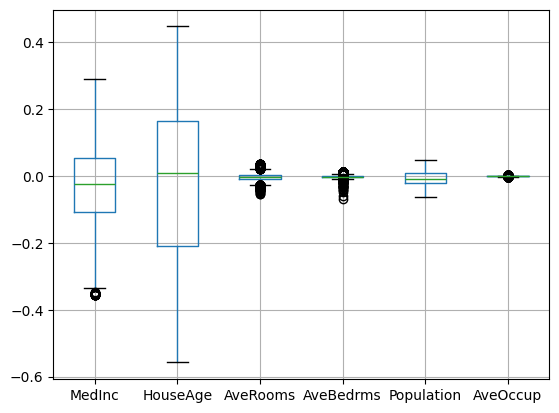

In [53]:
# Transformación lineal para comparar variables
norm_est_x=StandardScaler()
norm_rob_x=RobustScaler()

pd.DataFrame(X_train_transformada,columns=X_train.columns).boxplot() # Aplicamos eeehhh... Normalización estandar a las columnas 1 y 4, al resto, robusta

<Axes: >

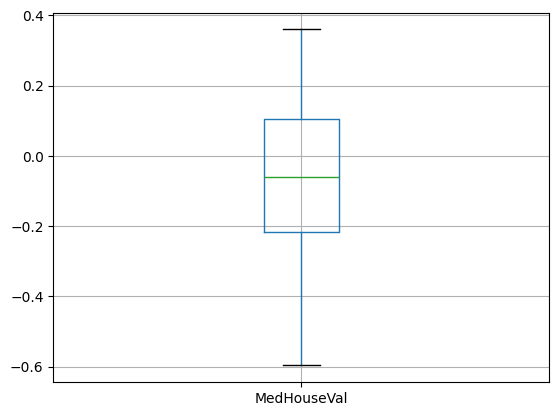

In [41]:
norm_est_y=StandardScaler()

pd.DataFrame(y_train_transformada,columns=y_train.columns).boxplot()

In [42]:
X_clean=pd.DataFrame(X_train_transformada,columns=X_train.columns) # StandardScaler -> cols=(1,4). RobustScaler -> cols=(0,2,3,5)
y_clean=pd.DataFrame(y_train_transformada,columns=y_train.columns)

y_clean=norm_est_y.fit_transform(y_clean)

In [43]:
# Código by Ubaldo & Julio
esc_std=StandardScaler()
X_esc=X_clean.copy()
est=["HouseAge","Population"]
X_esc[est]=esc_std.fit_transform(X_clean[est])

esc_rob=RobustScaler()
est2=[col for col in X_esc.columns if col not in est]
X_esc[est2]=esc_rob.fit_transform(X_clean[est2])

X_esc.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,15480.000000,1.548000e+04,1.548000e+04,15480.000000,1.548000e+04,15480.000000
mean,-0.007820,-3.121247e-17,-3.531241e-02,0.070082,9.180139e-18,0.015773
std,0.709821,1.000032e+00,8.053374e-01,1.124939,1.000032e+00,0.813353
min,-2.066905,-2.247557e+00,-4.449366e+00,-21.359880,-2.545779e+00,-3.567199
25%,-0.512930,-8.395144e-01,-5.301696e-01,-0.483231,-6.818146e-01,-0.494922
50%,0.000000,4.599445e-02,9.120851e-18,0.000000,-4.801923e-02,0.000000
75%,0.487070,6.756535e-01,4.698304e-01,0.516769,6.609431e-01,0.505078
max,1.970653,1.828254e+00,3.048821e+00,4.386260,2.565176e+00,3.421618


In [44]:
# Regresión lineal
reg=LinearRegression()

# Entrenación
reg.fit(X_esc,y_clean)

LinearRegression()

In [45]:
# Prueba
#
# Transformción lineal - Basada en la media
X_test_escalada=(X_test-me_x)/rango_x # Usamos la media y rango calculados en el entrenamiento
y_test_escalada=(y_test-me_y)/rango_y # Usamos la media y rango calculados en el entrenamiento

# Transformación Yeo-Johnson
X_test_transformada=pt_X.transform(X_test_escalada)                   # Usamos los lambdas_ calculados en el entrenamiento
y_test_transformada=pt_y.transform(y_test_escalada)                   # Usamos los lambdas_ calculados en el entrenamiento

# Transformación lineal - Estandar o Robusta
X_test_clean=pd.DataFrame(X_test_transformada,columns=X_test.columns)
y_test_clean=pd.DataFrame(y_test_transformada,columns=y_test.columns)

y_test_clean=norm_est_y.transform(y_test_clean)
#
est=["HouseAge","Population"]
X_test_esc=X_test_clean.copy()
X_test_esc[est]=esc_std.transform(X_test_clean[est])
est2=[col for col in X_esc.columns if col not in est]
X_test_esc[est2]=esc_rob.transform(X_test_clean[est2])

In [46]:
reg.score(X_esc,y_clean),reg.score(X_test_esc,y_test_clean)

(0.6042527226288481, 0.6137522742994153)

In [48]:
# Predicción
#
# Etapa de preprocesaho
df_X=df.drop(columns=['Latitude','Longitude','MedHouseVal']) # Separamos la X de la y
df_X_esc=(df_X-me_x)/rango_x                                 # Transformación lineal basada en la media
df_X_trans=pt_X.transform(df_X_esc)                          # Transformación Yeo-Johnson
df_X_trans=pd.DataFrame(df_X_trans,columns=df_X.columns)
df_X_norm=df_X_trans.copy()                                  # Transformación lineal - Estandar o Robusta
est=["HouseAge","Population"]
df_X_norm[est]=esc_std.transform(df_X_trans[est])            # Estandar
est2=[col for col in df_X_norm.columns if col not in est]
df_X_norm[est2]=esc_rob.transform(df_X_trans[est2])          # Robusta
#
# Etapa de predicción
y_predict=reg.predict(df_X_norm) # Unidades adimensionales
df_y_predict=pd.DataFrame(y_predict,columns=['MedHouseVal'])
#
# Etapa de inversas
y_norm=norm_est_y.inverse_transform(df_y_predict)            # Inversa de la normalización Estandar
df_y_norm=pd.DataFrame(y_norm,columns=['MedHouseVal'])
y_trans=pt_y.inverse_transform(df_y_norm)                    # Inversa de la transformación Yeo-Johnson
df_y_trans=pd.DataFrame(y_trans,columns=['MedHouseVal'])
inv_meanbased=lambda x,me,rango:x*rango+me
df_y=inv_meanbased(df_y_trans,me_y,rango_y) # Dólares        # Inversa de la normalización basada en la media

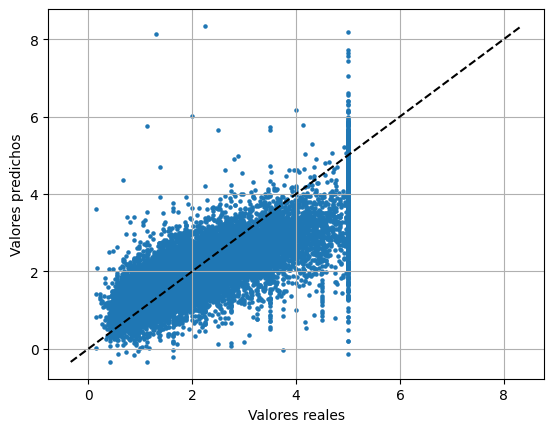

In [55]:
plt.scatter(df['MedHouseVal'],df_y,s=5)
x=[min(df['MedHouseVal'].min(),df_y.values.min()),
   max(df['MedHouseVal'].max(),df_y.values.max())]
plt.plot([min(x),max(x)],[min(x),max(x)],'k--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.grid()

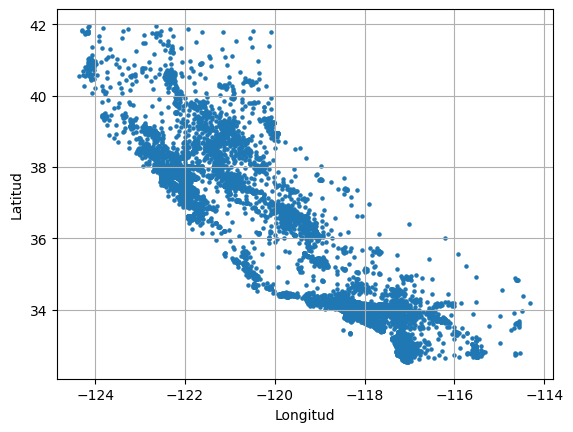

In [56]:
# Variables categóricas
plt.scatter(df['Longitude'],df['Latitude'],s=5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid()

In [57]:
from scipy.stats import yeojohnson

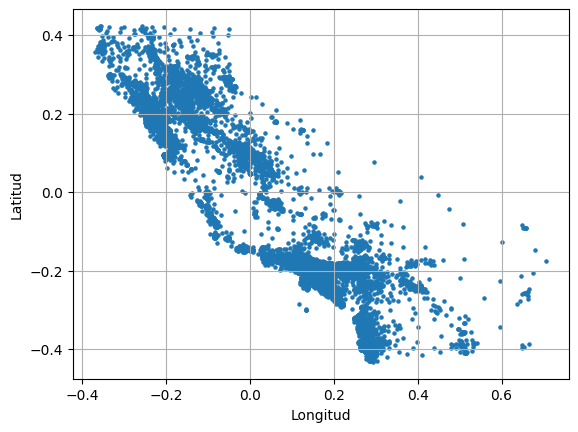

In [59]:
lon_yj,l_lon=yeojohnson((df['Longitude']-df['Longitude'].mean())/(df['Longitude'].max()-df['Longitude'].min()))
lat_yj,l_lat=yeojohnson((df['Latitude']-df['Latitude'].mean())/(df['Latitude'].max()-df['Latitude'].min()))

plt.scatter(lon_yj,lat_yj,s=5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid()